# Relaciones, Clausuras y Estructura Algebraica de Conectividad

## Resumen

Se desarrolla rigurosamente la teoría de relaciones sobre conjuntos finitos y no finitos, incluyendo relaciones binarias, n-arias, propiedades estructurales (reflexividad, simetría, antisimetría y transitividad), composición, inversa, relaciones de equivalencia, representación matricial booleana, representación mediante grafos dirigidos y construcción formal de cierres (reflexivo, simétrico y transitivo).


# 1. Definición Formal de Relación

Sean $ A $ y $ B $ conjuntos.

Una **relación binaria** de $ A $ en $ B $ es un subconjunto:

$$
R \subseteq A \times B
$$

Un par ordenado $ (a,b) \in R $ se denota:

$$
aRb
$$

El dominio y rango se definen como:

$$
\text{Dom}(R) = { a \in A \mid \exists b \in B, (a,b)\in R }
$$

$$
\text{Ran}(R) = { b \in B \mid \exists a \in A, (a,b)\in R }
$$

### Implementación computacional

In [1]:
A = {1,2,3}
B = {'a','b','c'}

R = {(1,'a'), (2,'b'), (3,'c')}

dominio = {a for (a,b) in R}
rango = {b for (a,b) in R}

dominio, rango

({1, 2, 3}, {'a', 'b', 'c'})

# 2. Relación Inversa

$$
R^{-1} = {(b,a)\mid (a,b)\in R}
$$

Propiedad:

$$
(R^{-1})^{-1} = R
$$

In [2]:
R_inv = {(b,a) for (a,b) in R}
R_inv

{('a', 1), ('b', 2), ('c', 3)}

# 3. Composición de Relaciones

Sean:

$$
R \subseteq A\times B, \quad S \subseteq B\times C
$$

La composición:

$$
S \circ R = {(a,c)\mid \exists b \in B: (a,b)\in R \land (b,c)\in S }
$$

In [3]:
A = {1,2,3,4}
B = {'a','b','c','d'}
C = {'x','y','z'}

R = {(1,'a'),(2,'d'),(3,'a'),(3,'b'),(3,'d')}
S = {('b','x'),('b','z'),('c','y'),('d','z')}

def composicion(R,S):
    return {(a,c) for (a,b1) in R for (b2,c) in S if b1 == b2}

composicion(R,S)

{(2, 'z'), (3, 'x'), (3, 'z')}

# 4. Propiedades de las Relaciones

Sea $ R \subseteq A\times A $.

## 4.1 Reflexividad

$$
\forall a\in A,\ (a,a)\in R
$$

## 4.2 Simetría

$$
(a,b)\in R \Rightarrow (b,a)\in R
$$

## 4.3 Antisimetría

$$
(a,b)\in R \land (b,a)\in R \Rightarrow a=b
$$

## 4.4 Transitividad

$$
(a,b)\in R \land (b,c)\in R \Rightarrow (a,c)\in R
$$

### Verificación Algorítmica

In [4]:
def es_reflexiva(R,A):
    return all((a,a) in R for a in A)

def es_simetrica(R):
    return all((b,a) in R for (a,b) in R)

def es_antisimetrica(R):
    return all(a==b or (b,a) not in R for (a,b) in R)

def es_transitiva(R):
    return all((a,c) in R
               for (a,b) in R
               for (b2,c) in R
               if b==b2)

A = {1,2,3,4}
R1 = {(1,1),(1,2),(2,1),(2,2),(3,4),(4,1),(4,4)}

es_reflexiva(R1,A), es_simetrica(R1), es_transitiva(R1)

(False, False, False)

# 5. Relaciones de Equivalencia

Una relación es de equivalencia si es:

* Reflexiva
* Simétrica
* Transitiva

Esto induce una partición del conjunto en clases:

$$
[a] = { x \in A \mid xRa }
$$

In [5]:
def clase_equivalencia(R,a):
    return {x for (x,y) in R if y==a}

R_eq = {(1,1),(2,2),(3,3),(4,4),(1,2),(2,1)}
clase_equivalencia(R_eq,1)

{1, 2}

# 6. Relaciones n-arias

Una relación n-aria es:

$$
R \subseteq A_1 \times A_2 \times \dots \times A_n
$$

Ejemplo geométrico:

$$
x^2 + y^2 + z^2 = 1
$$

In [6]:
import numpy as np

def pertenece_esfera(x,y,z):
    return abs(x**2 + y**2 + z**2 - 1) < 1e-6

pertenece_esfera(1,0,0)

True

# 7. Representación Matricial Booleana

Sea $ A={a_1,\dots,a_n} $.

$$
M_R[i,j] =
\begin{cases}
1 & (a_i,a_j)\in R \\
0 & \text{en otro caso}
\end{cases}
$$

In [7]:
import numpy as np

A = [1,2,3,4]
R = {(1,2),(2,2),(2,4),(3,2),(3,4),(4,1),(4,3)}

n = len(A)
index = {A[i]:i for i in range(n)}

MR = np.zeros((n,n), dtype=int)

for (a,b) in R:
    MR[index[a], index[b]] = 1

MR

array([[0, 1, 0, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [1, 0, 1, 0]])

## Criterios matriciales

* Reflexiva ⇔ diagonal principal = 1
* Simétrica ⇔ $ M = M^T $
* Antisimétrica ⇔ si $ m_{ij}=1 $ y $ i\ne j $, entonces $ m_{ji}=0 $

# 8. Representación con Grafos Dirigidos

Una relación sobre $ A $ equivale a un dígrafo:

* Vértices: elementos de $ A $
* Aristas: pares ordenados

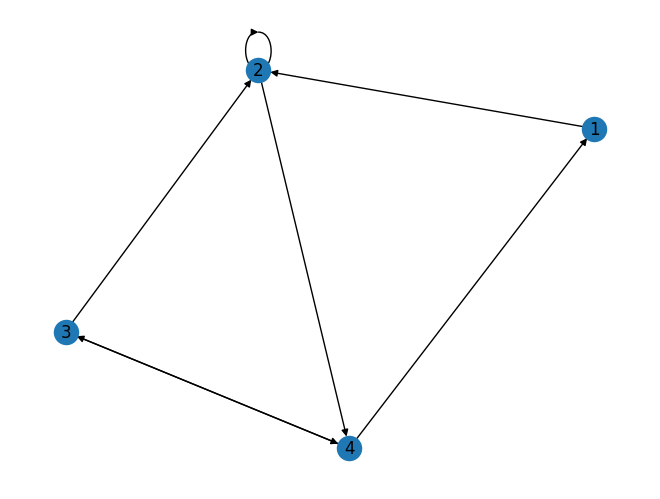

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(R)

nx.draw(G, with_labels=True)
plt.show()

# 9. Cierre de una Relación

Sea $ R \subseteq A\times A $.

## 9.1 Cierre Reflexivo

$$
R_{ref} = R \cup \Delta
$$

donde:

$$
\Delta = {(a,a)\mid a\in A}
$$

In [9]:
Delta = {(a,a) for a in A}
R_ref = R | Delta
R_ref

{(1, 1),
 (1, 2),
 (2, 2),
 (2, 4),
 (3, 2),
 (3, 3),
 (3, 4),
 (4, 1),
 (4, 3),
 (4, 4)}

## 9.2 Cierre Simétrico

$$
R_{sim} = R \cup R^{-1}
$$

In [10]:
R_sim = R | {(b,a) for (a,b) in R}
R_sim

{(1, 2),
 (1, 4),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 2),
 (3, 4),
 (4, 1),
 (4, 2),
 (4, 3)}

# 10. Caminos y Potencias de Relaciones

Definición:

Existe camino de longitud $ n $ de $ a $ a $ b $ ⇔

$$
(a,b) \in R^n
$$

donde:

$$
R^n = R \circ R^{n-1}
$$

# 11. Cierre Transitivo

$$
R^* = R \cup R^2 \cup \dots \cup R^n
$$

Con matrices booleanas:

$$
M_{R^*} = M_R \vee M_R^{[2]} \vee \dots \vee M_R^{[n]}
$$

## Implementación con multiplicación booleana

In [11]:
def producto_booleano(A,B):
    n = len(A)
    C = np.zeros((n,n), dtype=int)
    for i in range(n):
        for j in range(n):
            C[i,j] = int(any(A[i,k] and B[k,j] for k in range(n)))
    return C

def cierre_transitivo(M):
    n = len(M)
    R_star = M.copy()
    M_power = M.copy()
    for _ in range(n-1):
        M_power = producto_booleano(M_power, M)
        R_star = np.logical_or(R_star, M_power).astype(int)
    return R_star

cierre_transitivo(MR)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

# 12. Interpretación Estructural

El cierre transitivo equivale a la relación de conectividad:

$$
(a,b)\in R^* \iff \text{existe camino de } a \text{ a } b
$$

En grafos, representa alcanzabilidad.

En bases de datos, modela propagación de dependencia.

En física matemática, modela relaciones causales discretas.


# Conclusión

La teoría de relaciones constituye el fundamento algebraico de:

* Estructuras de orden
* Espacios cociente
* Bases de datos relacionales
* Teoría de grafos
* Modelos de conectividad y causalidad

La representación matricial booleana permite traducir propiedades estructurales en condiciones algebraicas sobre la diagonal y simetría matricial.

La clausura transitiva conecta la teoría relacional con la dinámica iterativa y la potencia matricial booleana, estableciendo un puente entre combinatoria, álgebra lineal y teoría de redes.

El marco presentado unifica formalización matemática rigurosa con verificación computacional reproducible, garantizando consistencia estructural y extensibilidad hacia análisis espectral, teoría de órdenes parciales y modelado de sistemas complejos.
